In [65]:
path = "/Users/kumarsanjeev/Desktop/Training Data/stack-overflow-data.csv"

In [66]:
import pandas as pd
data= pd.read_csv(path)

In [67]:
data.head()

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


In [68]:
data.columns

Index(['post', 'tags'], dtype='object')

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


In [76]:
X = data["post"]
y= data["tags"]

vect=TfidfVectorizer()
X=vect.fit_transform(data["post"])

In [78]:
from sklearn.feature_selection import chi2
# compute chi2 for each feature
chi2score = chi2(X,data["tags"])[0]

chi2score

array([151.43270067,  33.55331659,  17.17126172, ...,   7.23852515,
        11.90073376,   3.18298983])

In [95]:

from pylab import barh,plot,yticks,show,grid,xlabel,figure
figure(figsize=(6,6))
wscores = zip(vect.get_feature_names(),chi2score)
#print(list(wscores))
wchi2 = sorted(wscores,key=lambda x:x[1]) 
print(wchi2[-125:])
# topchi2 = zip(*wchi2[-25:])
# print(topchi2)
# x = range(len(topchi2[1]))
# labels = topchi2[0]
# barh(x,topchi2[1],align='center',alpha=.2,color='g')
# plot(topchi2[1],x,'-o',markersize=2,alpha=.8,color='g')
# yticks(x,labels)
# xlabel('$\chi^2$')
# show()

[('top', 368.8095086776869), ('void', 373.8573837853703), ('link_to', 381.96995942695213), ('drawable', 382.34745606612694), ('span', 384.40242637978383), ('wrap_content', 387.3314560734127), ('console', 388.7518182120866), ('static', 391.7154926048331), ('savedinstancestate', 392.681697387541), ('style', 392.9945035973045), ('module', 396.20261553199407), ('array', 400.44063600227287), ('application', 400.91304151698733), ('click', 408.74652409067966), ('layout_height', 409.9093200529339), ('import', 413.7235429508207), ('layout_width', 413.73185590165457), ('belongs_to', 421.49452749728493), ('color', 426.1515634404117), ('malloc', 431.2455887771527), ('rootscope', 431.8574197416812), ('dll', 432.44195354284756), ('varchar', 447.58779848317533), ('oncreate', 449.6250990580166), ('repeat', 451.81976339010464), ('left', 454.74728384518255), ('jsfiddle', 468.85616575853516), ('sizeof', 482.8598929022216), ('findviewbyid', 491.06445491424853), ('cpp', 495.92768177341634), ('gem', 497.001

<Figure size 432x432 with 0 Axes>

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
len(X_train),len(y_train),len(X_test),len(y_test)

(26800, 26800, 13200, 13200)

In [9]:
vectorizer = TfidfVectorizer()

In [10]:
X1=vectorizer.fit_transform(X_train)

In [11]:
X1

<26800x132760 sparse matrix of type '<class 'numpy.float64'>'
	with 1868815 stored elements in Compressed Sparse Row format>

In [12]:
X1_test=vectorizer.transform(X_test)

In [13]:
model=LogisticRegression()


In [14]:
model.fit(X1,y_train)

/Users/kumarsanjeev/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kumarsanjeev/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
y_predict=model.predict(X1_test)

In [16]:
model.score(X1_test,y_test)

0.803030303030303

In [66]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_predict, y_test)


0.803030303030303

In [48]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_predict,y_test,labels=['c++', 'php', 'angularjs', 'asp.net', 'mysql', 'sql', 'iphone',
       'css', 'java', 'jquery', 'c#', 'ios', 'c', 'objective-c',
       'ruby-on-rails', '.net', 'python', 'html', 'android', 'javascript'])


In [ ]:
cm = confusion_matrix(y_test, y_predict) 

cm_df = pd.DataFrame(cm,
                     index = ['c++', 'php', 'angularjs', 'asp.net', 'mysql', 'sql', 'iphone',
       'css', 'java', 'jquery', 'c#', 'ios', 'c', 'objective-c',
       'ruby-on-rails', '.net', 'python', 'html', 'android', 'javascript'], 
                     columns = ['business','scitech','sports', 'world'])

#Plot the heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(cm_df, 
            center=0, 
            cmap=sns.diverging_palette(220, 15, as_cmap=True), 
            annot=True, 
            fmt='g')

plt.title('SGD (loss = log) \nF1 Score (avg = macro) : {0:.2f}'.format(f1_score(y_test, y_pred, average='macro')), fontsize = 13)
plt.ylabel('True label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()

In [31]:
from sklearn.metrics import precision_score
p_score=precision_score(y_predict,y_test,average="macro")
print("p_score is {}".format(p_score))

p_score is 0.8025020930317431


In [46]:
from sklearn.metrics import classification_report
my_tags = ['c++', 'php', 'angularjs', 'asp.net', 'mysql', 'sql', 'iphone',
       'css', 'java', 'jquery', 'c#', 'ios', 'c', 'objective-c',
       'ruby-on-rails', '.net', 'python', 'html', 'android', 'javascript']

cl_report=classification_report(y_test,y_predict,target_names=my_tags)
print(cl_report)

               precision    recall  f1-score   support

          c++       0.71      0.68      0.69       679
          php       0.96      0.88      0.92       687
    angularjs       0.98      0.93      0.95       659
      asp.net       0.82      0.78      0.80       642
        mysql       0.79      0.87      0.83       654
          sql       0.60      0.65      0.62       655
       iphone       0.84      0.76      0.80       657
          css       0.82      0.87      0.84       666
         java       0.68      0.74      0.71       669
       jquery       0.68      0.68      0.68       650
           c#       0.69      0.68      0.69       660
          ios       0.91      0.83      0.87       668
            c       0.81      0.78      0.80       678
  objective-c       0.86      0.84      0.85       647
ruby-on-rails       0.83      0.80      0.82       644
         .net       0.69      0.69      0.69       630
       python       0.84      0.86      0.85       641
         

In [75]:
my_tags = ['c++', 'php', 'angularjs', 'asp.net', 'mysql', 'sql', 'iphone',
       'css', 'java', 'jquery', 'c#', 'ios', 'c', 'objective-c',
       'ruby-on-rails', '.net', 'python', 'html', 'android', 'javascript']


In [76]:
#y_test.unique()

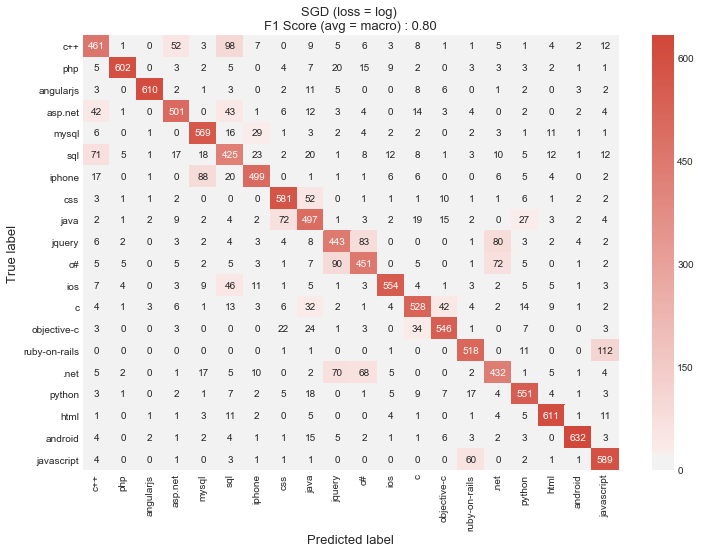

In [42]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
cm = confusion_matrix(y_test, y_predict) 

cm_df = pd.DataFrame(cm,
                     index = ['c++', 'php', 'angularjs', 'asp.net', 'mysql', 'sql', 'iphone',
       'css', 'java', 'jquery', 'c#', 'ios', 'c', 'objective-c',
       'ruby-on-rails', '.net', 'python', 'html', 'android', 'javascript'], 
                     columns = ['c++', 'php', 'angularjs', 'asp.net', 'mysql', 'sql', 'iphone',
       'css', 'java', 'jquery', 'c#', 'ios', 'c', 'objective-c',
       'ruby-on-rails', '.net', 'python', 'html', 'android', 'javascript'])

#Plot the heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(cm_df, 
            center=0, 
            cmap=sns.diverging_palette(220, 15, as_cmap=True), 
            annot=True, 
            fmt='g')

plt.title('SGD (loss = log) \nF1 Score (avg = macro) : {0:.2f}'.format(f1_score(y_test, y_predict, average='macro')), fontsize = 13)
plt.ylabel('True label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()

# Feature Engineering

In [55]:
path="/Users/KumarSanjeev/Desktop/Training Data/Churn_Modelling.csv"

In [56]:
data= pd.read_csv(path)

In [57]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [59]:
numericColumns = ['CreditScore' , 'Age', 'Tenure', 'Balance',  'EstimatedSalary']
categoryColumns = ['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']